## EXERCISE 2

Visualize and clusterize the data in the file x_12d.dat (N=600 samples, L=12 dimensions), which also has labels for checking the performances (y_12d.dat).

| Name | Surname | ID Number |
|------|---------|---------------------|
| Lucrezia | Rossi | 2122164 |
| Lorenzo | Calandra Buonaura | 2107761 |
| Andrea | Turci | 2106724 |

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 13

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import normalized_mutual_info_score

### 1\. “eps” (ε) and “minPts” (mP) in DBSCAN algorithm for clustering
Refine the grid with more values of ε and mP and plot a heat-map showing the normalized mutual information (NMI) between true and predicted clusters, similar to the one on the right.

Is the high NMI region showing a correlation between ε and mP?

Note: In the lesson we have looked at the typical distance between a point and its closest neighbor, but this does not say what the typical distance is from the 2nd, 3rd , ..., mP-neighbor. The plots of ranked distances to the i-th neighbor might also help choose the ε for a given i=mP .

In [2]:
fname, fnamey = "x_12d.dat", "y_12d.dat"
data = np.loadtxt("DATA/" + fname, delimiter='\t')
y = np.loadtxt("DATA/" + fnamey, dtype=int)

N = len(data)
D = len(data[0])
print(f"N = {N},    L = D = {D}")

x=data

N = 600,    L = D = 12


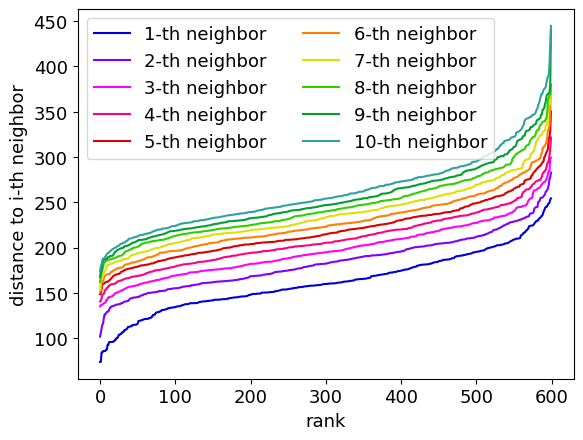

mean minimum distance to the first neighbor:  162.34622464324366
mean minimum distance to the second neighbor:  184.04201690089715
mean minimum distance to the third neighbor:  197.80319593476946


In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

nn = 10
nbrs = NearestNeighbors(n_neighbors=nn+1).fit(x)  # assuming 'x' is your data
d, ind = nbrs.kneighbors(x)
dd = d.T

# Plot the distances to the first and second neighbors
listc = ["#0000DD", "#8000FF", "#FF00FF", "#FF0080", "#DD0000",
         "#FF8000", "#E0E000", "#30D000", "#00A030", "#33A0A0"]

for i in range(1, nn+1):
    plt.plot(np.sort(dd[i]), c=listc[i-1], label=f"{i}-th neighbor")
    plt.xlabel("rank")
    plt.ylabel("distance to i-th neighbor")

plt.legend(ncol=2)
plt.show()

# Compute the mean distances to the first and second neighbors
mean_min_dist_1st = np.mean(dd[1])
mean_min_dist_2nd = np.mean(dd[2])
mean_min_dist_3rd = np.mean(dd[3])

print("mean minimum distance to the first neighbor: ", mean_min_dist_1st)
print("mean minimum distance to the second neighbor: ", mean_min_dist_2nd)
print("mean minimum distance to the third neighbor: ", mean_min_dist_3rd)

In [13]:
min_eps, max_eps, num_eps = 1, 300, 100
min_minPts, max_minPts, step_minPts = 1, 50, 1

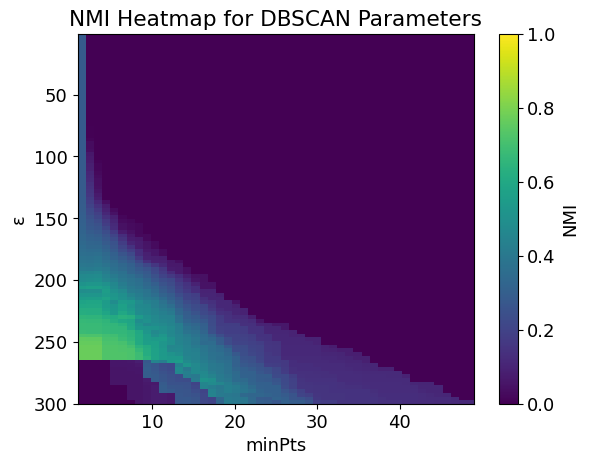

In [19]:
eps_values = np.linspace(min_eps, max_eps, num_eps)
minPts_values = np.arange(min_minPts, max_minPts, step_minPts)

# Initialize a 2D array to store NMI values
nmi_values = np.zeros((len(eps_values), len(minPts_values)))

# Loop through the grid and compute NMI for each combination
for i, eps in enumerate(eps_values):
    for j, minPts in enumerate(minPts_values):
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        predicted_labels = dbscan.fit_predict(data)
        nmi = normalized_mutual_info_score(y, predicted_labels)
        nmi_values[i, j] = nmi

# Plot the heatmap with inverted y-axis
plt.imshow(nmi_values, extent=[minPts_values[0], minPts_values[-1], eps_values[0], eps_values[-1]], aspect='auto', origin='lower')
plt.colorbar(label='NMI')
plt.clim(0, 1)  # Set color scale limits
plt.xlabel('minPts')
plt.ylabel('ε')
plt.title('NMI Heatmap for DBSCAN Parameters')

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()

### 2\. Understanding the 12-dimensional data
Use the principal component analysis (PCA) to visualize the first components of the data. Does it help understand its structure?

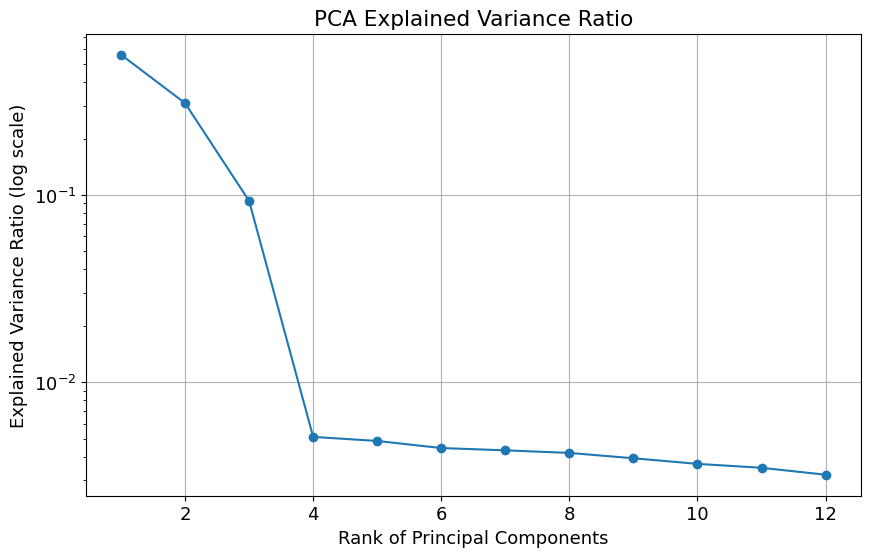

In [24]:
# Assuming 'x' is your data
pca = PCA()
pca.fit(x)

# Plot the explained variance ratio with a larger number of components
num_components = min(x.shape[0], x.shape[1])
components_range = np.arange(1, num_components + 1)

plt.figure(figsize=(10, 6))
plt.plot(components_range, pca.explained_variance_ratio_, marker='o')
plt.yscale('log')
plt.xlabel('Rank of Principal Components')
plt.ylabel('Explained Variance Ratio (log scale)')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

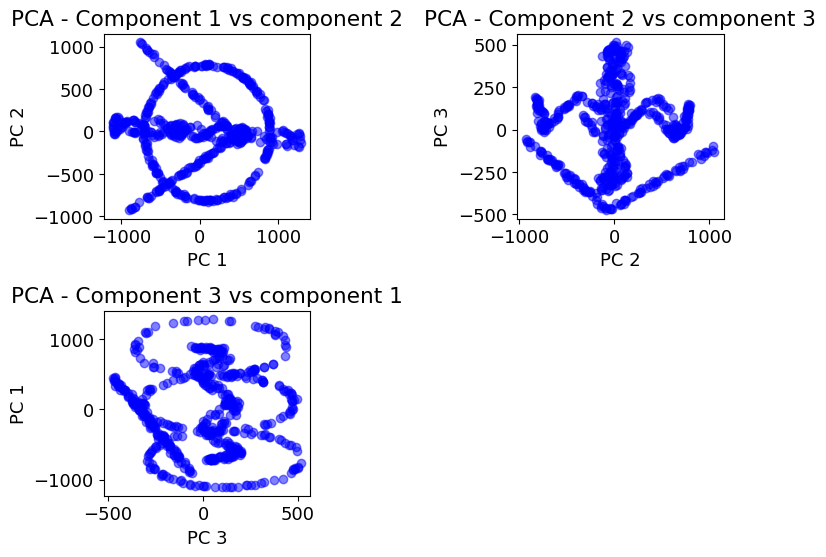

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'x' is your data
# Perform PCA with the desired number of components (e.g., 2 for 2D visualization)
num_components = 3
pca = PCA(n_components=num_components)
x_pca = pca.fit_transform(x)

# Plot the data in the PCA space
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(221)
ax.scatter(x_pca[:, 0], x_pca[:, 1], c='b', alpha=0.5)
ax.set_title('PCA - Component 1 vs component 2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax = plt.subplot(222)
ax.scatter(x_pca[:, 1], x_pca[:, 2], c='b', alpha=0.5)
ax.set_title('PCA - Component 2 vs component 3')
ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')
ax = plt.subplot(223)
ax.scatter(x_pca[:, 2], x_pca[:, 0], c='b', alpha=0.5)
ax.set_title('PCA - Component 3 vs component 1')
ax.set_xlabel('PC 3')
ax.set_ylabel('PC 1')

plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)

plt.show()

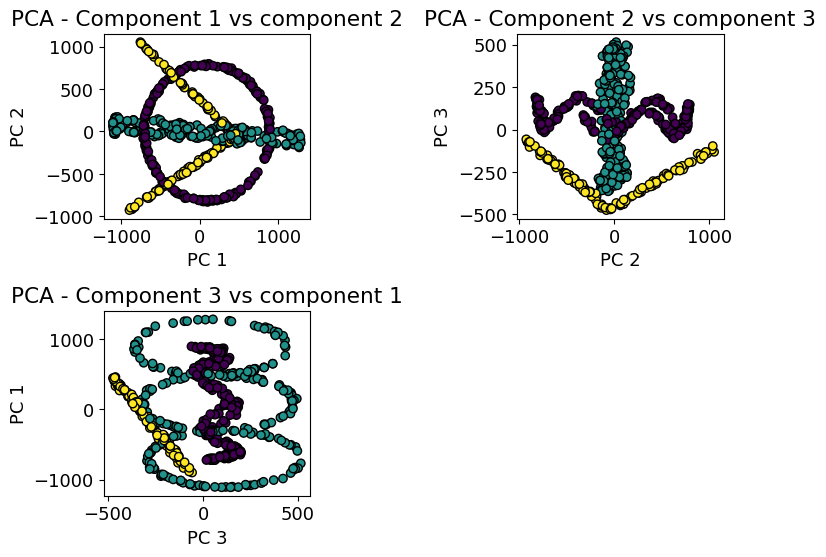

In [63]:
#TRUE DATA

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(221)
ax.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 1 vs component 2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax = plt.subplot(222)
ax.scatter(x_pca[:, 1], x_pca[:, 2], c=y, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 2 vs component 3')
ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')
ax = plt.subplot(223)
ax.scatter(x_pca[:, 2], x_pca[:, 0], c=y, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 3 vs component 1')
ax.set_xlabel('PC 3')
ax.set_ylabel('PC 1')

plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)

plt.show()

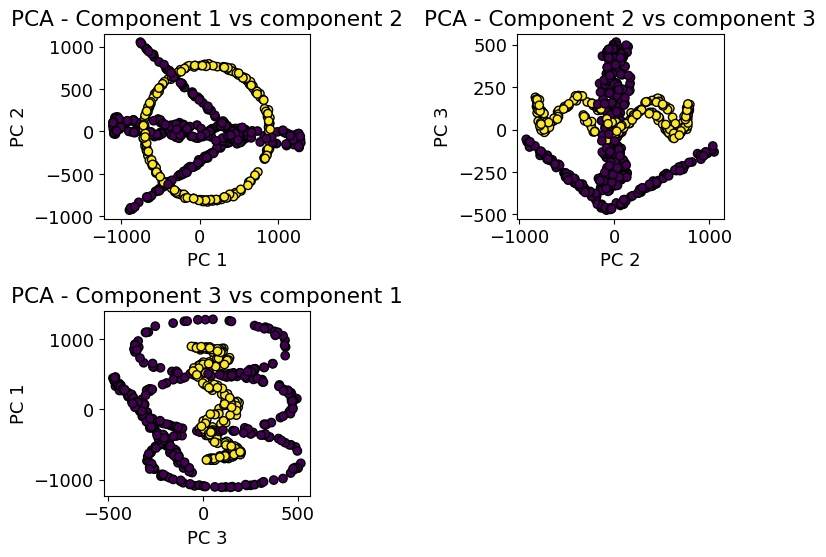

In [75]:
# DBSCAN Clustering
eps_value = 260  # Adjust the value based on your dataset
min_samples_value = 3 # Adjust the value based on your dataset
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(x)

# Plot the data in the PCA space
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(221)
ax.scatter(x_pca[:, 0], x_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 1 vs component 2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax = plt.subplot(222)
ax.scatter(x_pca[:, 1], x_pca[:, 2], c=dbscan_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 2 vs component 3')
ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')
ax = plt.subplot(223)
ax.scatter(x_pca[:, 2], x_pca[:, 0], c=dbscan_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 3 vs component 1')
ax.set_xlabel('PC 3')
ax.set_ylabel('PC 1')

plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)

plt.show()

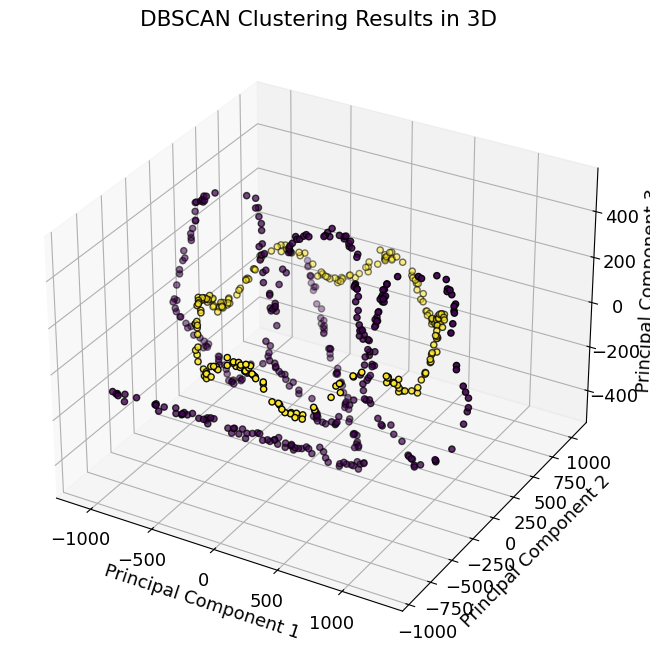

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=dbscan_labels, cmap='viridis', edgecolors='k')

ax.set_title('DBSCAN Clustering Results in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

### 3\. Compare different clustering methods
a) Perform a k-means clustering of the data, with k=3. Does it work better than DBSCAN? Why?

b) Perform a hierarchical clustering of the data and plot the corresponding dendrogram. 
Does it work better than DBSCAN?

/home/kallo27/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


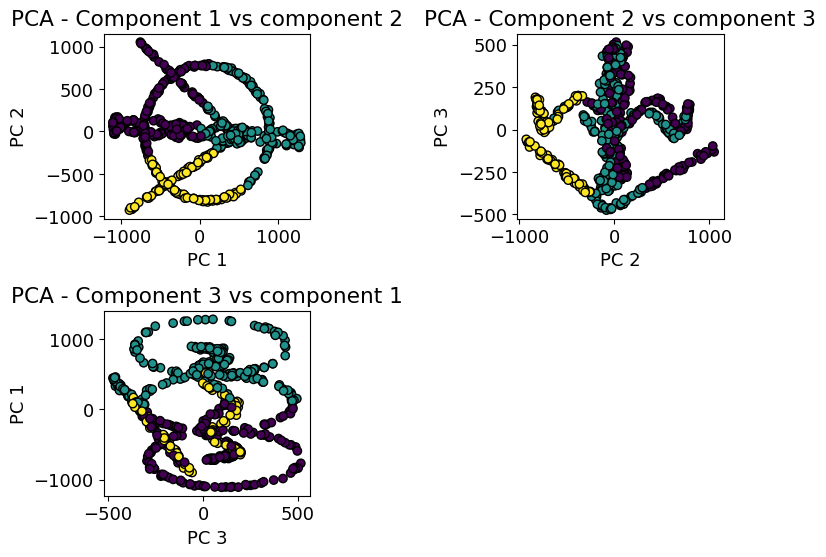

In [50]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(x)

# Plot the data in the PCA space
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(221)
ax.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 1 vs component 2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax = plt.subplot(222)
ax.scatter(x_pca[:, 1], x_pca[:, 2], c=kmeans_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 2 vs component 3')
ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')
ax = plt.subplot(223)
ax.scatter(x_pca[:, 2], x_pca[:, 0], c=kmeans_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 3 vs component 1')
ax.set_xlabel('PC 3')
ax.set_ylabel('PC 1')

plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)

plt.show()

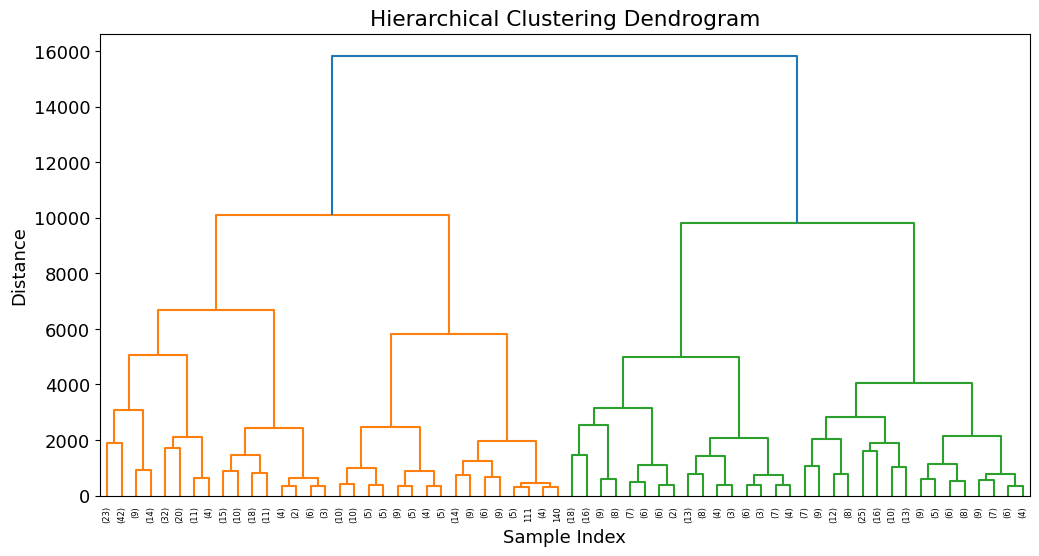

In [52]:
linkage_matrix = linkage(x, method='ward', metric='euclidean')

# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=5, truncate_mode='level', orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

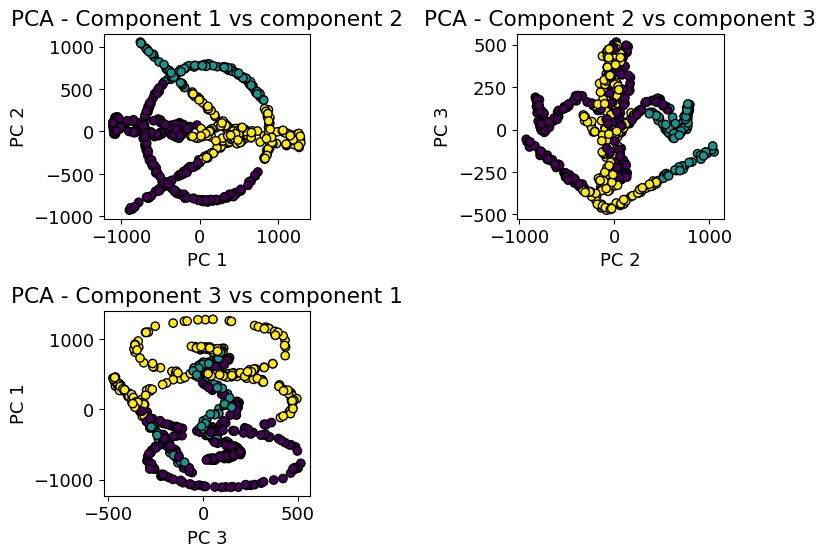

In [56]:
num_clusters = 3 
hierarchical_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Plot the data in the PCA space
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(221)
ax.scatter(x_pca[:, 0], x_pca[:, 1], c=hierarchical_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 1 vs component 2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax = plt.subplot(222)
ax.scatter(x_pca[:, 1], x_pca[:, 2], c=hierarchical_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 2 vs component 3')
ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')
ax = plt.subplot(223)
ax.scatter(x_pca[:, 2], x_pca[:, 0], c=hierarchical_labels, cmap='viridis', edgecolors='k')
ax.set_title('PCA - Component 3 vs component 1')
ax.set_xlabel('PC 3')
ax.set_ylabel('PC 1')

plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)

plt.show()

In [62]:
# Questa parte non ha molto senso credo

from sklearn.metrics import silhouette_score

# Silhouette score for hierarchical clustering
hierarchical_silhouette = silhouette_score(x, hierarchical_labels)

# Silhouette score for DBSCAN
dbscan_silhouette = silhouette_score(x, dbscan_labels)

print(f"Silhouette score DBSCAN: {dbscan_silhouette}")
print(f"Silhouette score hierarchical clustering: {hierarchical_silhouette}") # higher silhouette score = higher accuracy

Silhouette score DBSCAN: 0.046636254013615604
Silhouette score hierarchical clustering: 0.29472027912663057


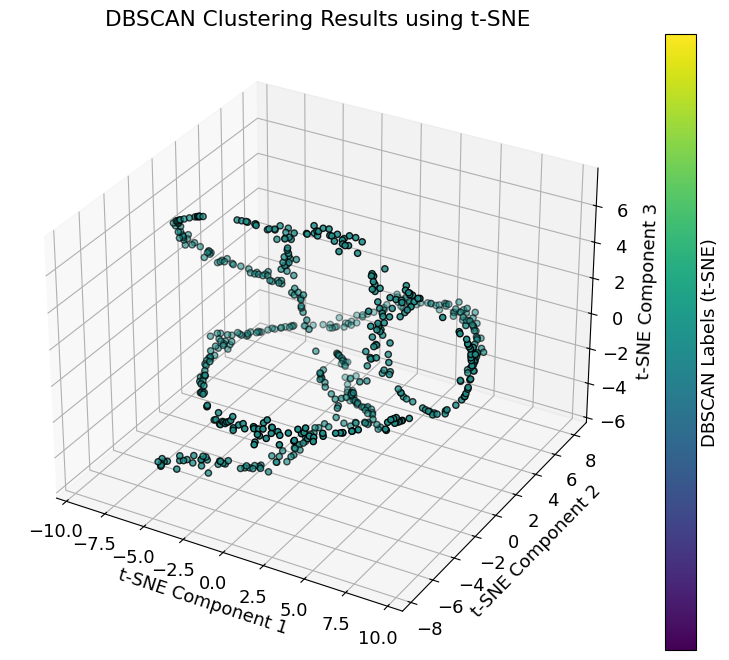

In [96]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'x' is your data
# Replace 'x' with your actual data variable

# Perform t-SNE for visualization in 3D
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(x)

# Perform DBSCAN clustering on the t-SNE data
eps_value = 260  # Adjust epsilon based on your preference
min_samples_value = 3  # Adjust min_samples based on your preference
dbscan_tsne = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels_tsne = dbscan_tsne.fit_predict(data_tsne)

# Visualize Results in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_tsne[:, 0], data_tsne[:, 1], data_tsne[:, 2], c=dbscan_labels_tsne, cmap='viridis', edgecolors='k')

# Add colorbar
cb = fig.colorbar(scatter, ax=ax, label='DBSCAN Labels (t-SNE)')
cb.set_ticks([])
cb.update_ticks()

ax.set_title('DBSCAN Clustering Results using t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.show()

standard: 0.16 sec
ltsa: 0.23 sec
hessian: 0.43 sec
modified: 0.36 sec


/home/kallo27/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/kallo27/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


ISO: 0.22 sec


/home/kallo27/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS: 1.1 sec
Spectral Embedding: 0.11 sec


/home/kallo27/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


t-SNE: 3.1 sec


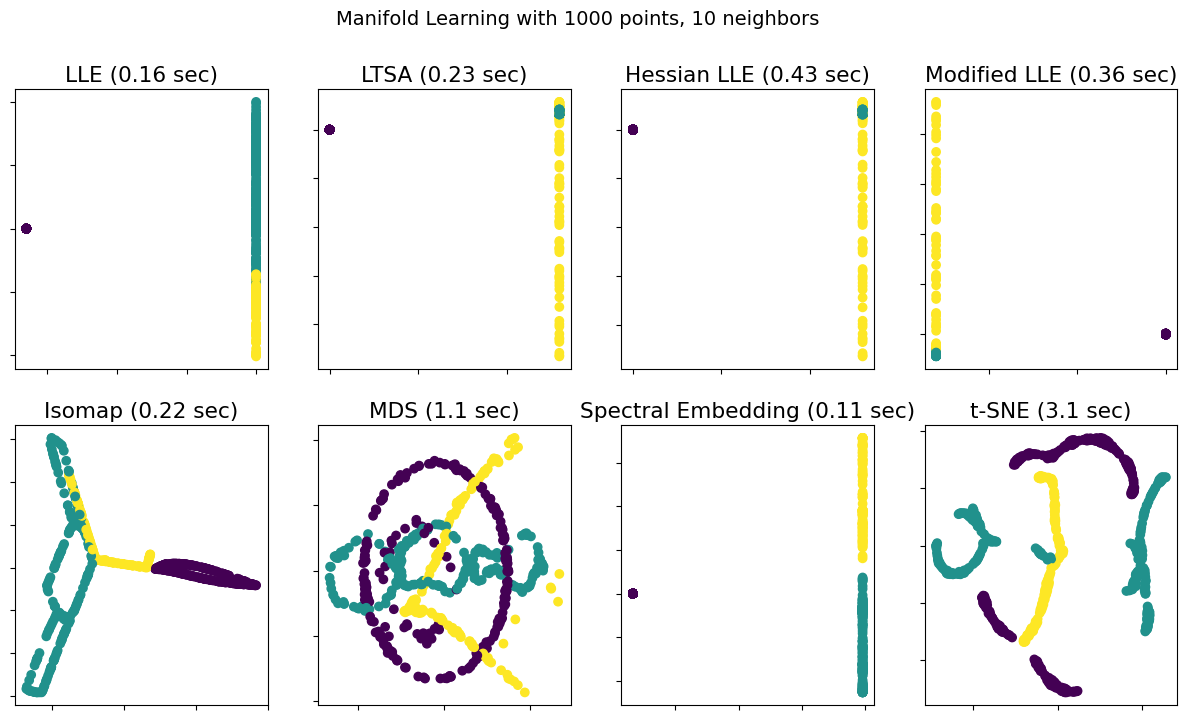

In [102]:
from time import time

import matplotlib.pyplot as plt

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Variables for manifold learning.
n_neighbors = 10
n_samples = 600

fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method, random_state=42
        )
        .fit_transform(x_pca)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(241 + i)
    ax.scatter(trans_data[0], trans_data[1], c=y, cmap='viridis')
    ax.set_title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(x_pca)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(245)
ax.scatter(trans_data[0], trans_data[1], c=y, cmap='viridis')
ax.set_title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis("tight")

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1, random_state=42)
trans_data = mds.fit_transform(x_pca).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(246)
ax.scatter(trans_data[0], trans_data[1], c=y, cmap='viridis')
ax.set_title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis("tight")

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(
    n_components=2, n_neighbors=n_neighbors, random_state=42
)
trans_data = se.fit_transform(x_pca).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(247)
ax.scatter(trans_data[0], trans_data[1], c=y, cmap='viridis')
ax.set_title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis("tight")

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=0)
trans_data = tsne.fit_transform(x_pca).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(248)
ax.scatter(trans_data[0], trans_data[1], c=y, cmap='viridis')
ax.set_title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis("tight")

plt.show()